## Reto 1: K-Medias

### 1. Objetivos:
    - Aprender a aplicar un algoritmo de K-Medias
    
---
    
### 2. Desarrollo:

### Segmentación por subregiones de los usuarios de un producto

Tenemos un conjunto de datos llamado 'distribucion_usuarios.csv'. En este dataset tenemos las latitudes y longitudes de todos los usuarios de un producto que viven en una misma región. Como compañía, queremos establecer centros de servicio al cliente para atender todas las demandas de servicios en esta región. Vamos a utilizar el algoritmo K-Medias para segmentar nuestra región en subregiones. Cada subregión tendrá un centro de servicio en su centroide.

El dataset también contiene el código único de cada usuario y 4 columnas llamadas: 'producto_1', 'producto_2', 'producto_3', 'producto_4'. Estas columnas contienen un 1 en caso de que el usuario haya adquirido ese producto, y un 0 en caso de que el producto no haya sido adquirido.

Tu Reto consiste en lo siguiente:

1. Lee el dataset 'distribucion_usuarios.csv'.
2. Utiliza un scatterplot para visualizar las latitudes y longitudes de tu conjunto de datos.
3. Después utiliza la clase KMeans de `scikit-learn` para encontrar 7 centroides.
4. Ya que hayas encontrado tus centroides, crea una nueva visualización donde además de tus puntos, grafiques los 7 centros.
5. Ahora, utiliza tu modelo para clasificar tus puntos.
6. Después agrega segmentación por color a tu gráfica para que los puntos se coloreen de acuerdo al grupo al que pertenecen.
7. Ya que tienes tus puntos clasificados, agrega la clasificación al DataFrame original.
8. Ahora, segmenta tu DataFrame por grupo y obtén los siguientes datos:
    1. Cantidad total de usuarios por grupo
    2. Cantidades totales de producto 1, 2, 3 y 4 por grupo
9. Realiza una gráfica de barras para visualizar la cantidad de usuarios que hay en cada uno de los grupos
10. Finalmente, genera una gráfica de barras apiladas con los totales de productos adquiridos por grupo. Cada segmento de la barra será la cantidad de producto adquirido en un grupo en específico.
11. Comenta tus hallazgos con tus compañeros y la experta.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/work/B2-Analisis-de-Datos-con-Python-2020-2021-Santander/Datasets/distribucion_usuarios.csv')
df.head()

,codigo_de_usuario,producto_1,producto_2,producto_3,producto_4,latitud,longitud
0,1,0,0,0,0,14.277305,-5.958917
1,2,0,0,1,0,-9.958963,1.036839
2,3,0,0,1,0,7.859551,1.932572
3,4,1,1,1,1,-8.989976,6.969268
4,5,1,0,0,0,-6.641690,-0.777759


<AxesSubplot:xlabel='latitud', ylabel='longitud'>

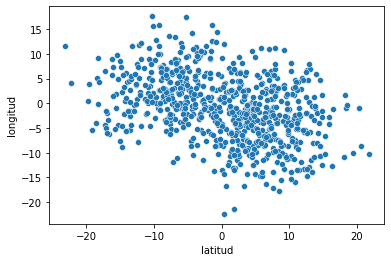

In [ ]:
sns.scatterplot(data=df,x='latitud',y='longitud')

In [ ]:
k_means=KMeans(n_clusters=7,max_iter=10_000)
k_means.fit(df[['latitud','longitud']])

KMeans(max_iter=10000, n_clusters=7)

In [ ]:
centers = k_means.cluster_centers_


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='latitud', ylabel='longitud'>

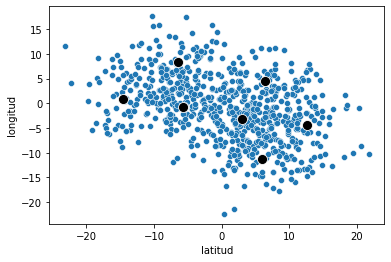

In [ ]:
sns.scatterplot(df['latitud'],df['longitud'])
sns.scatterplot(centers[:,0],centers[:,1],color='black',s=100)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='latitud', ylabel='longitud'>

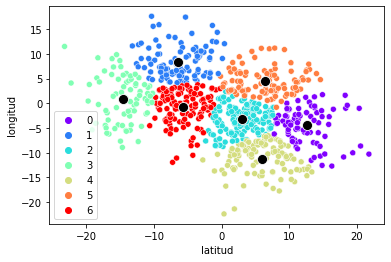

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

clasificacion = k_means.predict(df[['latitud','longitud']])

sns.scatterplot(df['latitud'],df['longitud'],hue=clasificacion,palette='rainbow',ax=ax)
sns.scatterplot(centers[:,0],centers[:,1],color='black',s=100,ax=ax)
#ax.get_legend().remove()

In [ ]:
df['clasificacion'] = clasificacion

In [ ]:
#8 a)
#df['contador'] = 1
#grouped_by_class = df.groupby('clasificacion')['contador'].sum()
print(grouped_by_class)

df['clasificacion'].value_counts()

clasificacion
0    130
1    110
2     80
3    113
4    175
5    141
Name: contador, dtype: int64


2    143
6    131
1    108
4    104
5    101
0     84
3     78
Name: clasificacion, dtype: int64

In [ ]:
tt = df['producto_'].sum()
tt

KeyError: 'producto_5'

In [ ]:
#8 b)
grouped_by_product = df.groupby('clasificacion')[['producto_1','producto_2','producto_3','producto_4']].sum()
grouped_by_product

,producto_1,producto_2,producto_3,producto_4
clasificacion,,,,
0,90,17,63,21
1,86,5,63,16
2,55,10,41,19
3,61,14,66,22
4,125,17,88,40
5,93,14,63,27


In [ ]:
grouped_by_product

,producto_1,producto_2,producto_3,producto_4,total
clasificacion,,,,,
0,90,17,63,21,191
1,86,5,63,16,170
2,55,10,41,19,125
3,61,14,66,22,163
4,125,17,88,40,270
5,93,14,63,27,197


In [ ]:
#grouped_by_product['total'] = grouped_by_product['producto_1'] + grouped_by_product['producto_2'] + grouped_by_product['producto_3'] + grouped_by_product['producto_4']
grouped_by_product = grouped_by_product.drop(columns='total')

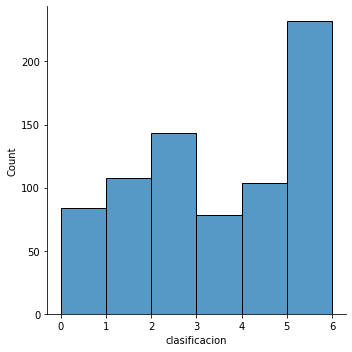

In [ ]:
sns.displot(data=df,x='clasificacion',binwidth=1)

In [ ]:
sns.displot(data=df,x='clasificacion',hue='total',palette='rainbow',multiple='stack',bins=1)

ValueError: Could not interpret value `total` for parameter `hue`

![Picture title](image-20210923-235319.png)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f8149d1c-e6b1-497a-9109-f01641a8231a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>